In [29]:
%matplotlib inline

In [79]:
import os
import mripy
import matplotlib.pyplot as plt
from mripy.xrfunc.io import load_nii
from mripy.xrfunc.transform import interpolate_to_volume
import numpy as np
np.set_printoptions(2)

In [31]:
subject_folder = '../mripy/tests/data/nifti/20170914_sibgatulin/'
magn_path = os.path.join(subject_folder, 't1w_mege_sag_m.nii')
rf_path = os.path.join(subject_folder, 'rf_sens_sag.nii')

In [32]:
spatial_dims = ('line','read','slice')

In [111]:
magn = load_nii(magn_path, dims=spatial_dims+('echo',), coords={'echo': [ 8.12, 13.19, 19.26, 24.33, 29.4]})
rf_sag = load_nii(rf_path, dims=spatial_dims)

# Compare the inputs

In [34]:
print(f'magnitude shape: {magn.shape}\nlow resolution shape: {rf.shape}')

magnitude shape: (240, 256, 176, 5)
low resolution shape: (56, 64, 44)


In [35]:
magn.isel(slice=slice(10,None,30),echo=0).plot(x='line',y='read',col='slice',
                                            col_wrap=3,robust=True,
                                            subplot_kws={'aspect':1})

In [36]:
rf_sag.isel(slice=slice(10,None,10)).plot(x='line',y='read',col='slice',
                                            col_wrap=3,robust=True,
                                            subplot_kws={'aspect':1})

# Interpolate

In [37]:
rf_res = interpolate_to_volume(rf_sag, magn, ijk_source_dims=spatial_dims, ijk_target_dims=spatial_dims)

# Compare the results

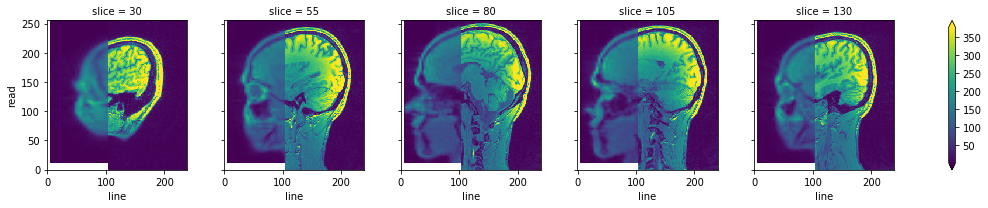

In [40]:
merged = rf_res.sel(line=slice(0,104)).combine_first(magn.sel(line=slice(105,None)))
merged.isel(slice=slice(30,140,25),echo=0).plot(x='line',y='read',col='slice',
                                         col_wrap=5,robust=True, 
                                         subplot_kws={'aspect':1})

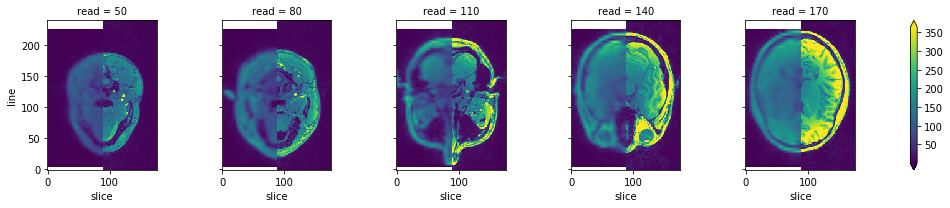

In [43]:
merged = rf_res.sel(slice=slice(0,89)).combine_first(magn.sel(slice=slice(90,None)))
merged.isel(read=slice(50,175,30),echo=0).plot(x='slice',y='line',col='read',
                                         col_wrap=5,robust=True, 
                                         subplot_kws={'aspect':1})

# Permuted dimensions

In [44]:
rf_tra_path = os.path.join(subject_folder, 'rf_sens_tra.nii')

In [98]:
rf_tra = load_nii(rf_tra_path, dims=spatial_dims)

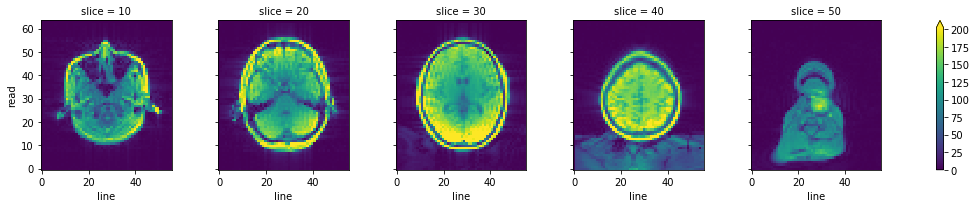

In [100]:
rf_tra.isel(slice=slice(10,None,10)).plot(x='line',y='read',col='slice',
                                            col_wrap=5,robust=True,
                                            subplot_kws={'aspect':1})

In [102]:
rf_tra_res = interpolate_to_volume(rf_tra, magn, ijk_source_dims=spatial_dims, ijk_target_dims=spatial_dims)

In [103]:
rf_tra_res.isel(slice=slice(30,140,25)).plot(x='line',y='read',col='slice',
                                         col_wrap=5,robust=True, 
                                         subplot_kws={'aspect':1})

In [109]:
merged = rf_tra_res.sel(line=slice(0,104)).combine_first(magn.sel(line=slice(105,None),echo=8.12))

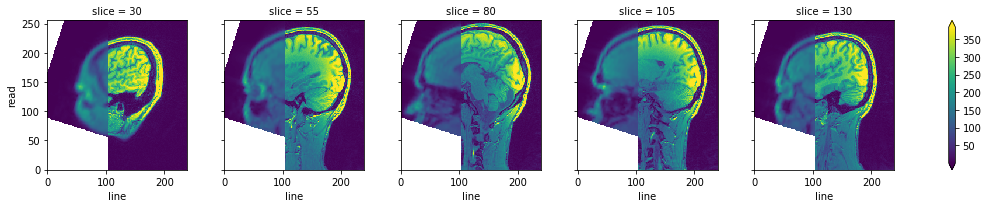

In [110]:
merged.isel(slice=slice(30,140,25)).plot(x='line',y='read',col='slice',
                                         col_wrap=5,robust=True, 
                                         subplot_kws={'aspect':1})

# Interpolating ME data

In [112]:
magn_res = interpolate_to_volume(magn, rf_sag, ijk_source_dims=spatial_dims, ijk_target_dims=spatial_dims)

In [116]:
merged = magn_res.sel(line=slice(0,28)).combine_first(rf_sag.sel(line=slice(29,None)))
merged.isel(slice=slice(15,30,10)).plot(x='line',y='read', row='slice', col='echo', robust=True, 
                                         subplot_kws={'aspect':1})